## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
from tensorflow import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.regularizers import l1, l2, l1_l2
"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], regularizer=l1(1e-8)):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=regula)(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=regula)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

Using TensorFlow backend.


In [15]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
REGULA=[l1(1e-8),l2(1e-8),l1_l2(1e-8)]
REGULA_NAME=["l1","l2","l1_l2"]

In [17]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regula,name in zip(REGULA,REGULA_NAME):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %s" % (name))
    model = build_mlp(input_shape=x_train.shape[1:], regularizer=regula)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = name + str(1e-8)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = l1
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============

Epoch 48/50
50000/50000 [==============================] - 22s 442us/sample - loss: 0.8800 - accuracy: 0.6930 - val_loss: 1.3942 - val_accuracy: 0.5309
Epoch 49/50
50000/50000 [==============================] - 22s 435us/sample - loss: 0.8632 - accuracy: 0.6972 - val_loss: 1.4052 - val_accuracy: 0.5311
Epoch 50/50
50000/50000 [==============================] - 21s 421us/sample - loss: 0.8566 - accuracy: 0.6995 - val_loss: 1.4804 - val_accuracy: 0.5078
Experiment with Regulizer = l2
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________

Epoch 45/50
50000/50000 [==============================] - 8s 169us/sample - loss: 0.9438 - accuracy: 0.6675 - val_loss: 1.3891 - val_accuracy: 0.5219
Epoch 46/50
50000/50000 [==============================] - 8s 167us/sample - loss: 0.9314 - accuracy: 0.6696 - val_loss: 1.4017 - val_accuracy: 0.5206
Epoch 47/50
50000/50000 [==============================] - 8s 169us/sample - loss: 0.9186 - accuracy: 0.6751 - val_loss: 1.4247 - val_accuracy: 0.5219
Epoch 48/50
50000/50000 [==============================] - 8s 167us/sample - loss: 0.9133 - accuracy: 0.6789 - val_loss: 1.3776 - val_accuracy: 0.5319
Epoch 49/50
50000/50000 [==============================] - 9s 171us/sample - loss: 0.8964 - accuracy: 0.6840 - val_loss: 1.3642 - val_accuracy: 0.5340
Epoch 50/50
50000/50000 [==============================] - 8s 170us/sample - loss: 0.8840 - accuracy: 0.6892 - val_loss: 1.3721 - val_accuracy: 0.5373
Experiment with Regulizer = l1_l2
Model: "model"
_____________________________________________

50000/50000 [==============================] - 11s 214us/sample - loss: 1.6525 - accuracy: 0.5143 - val_loss: 1.7451 - val_accuracy: 0.4777
Epoch 42/50
50000/50000 [==============================] - 10s 203us/sample - loss: 1.6435 - accuracy: 0.5178 - val_loss: 1.7008 - val_accuracy: 0.4932
Epoch 43/50
50000/50000 [==============================] - 10s 198us/sample - loss: 1.6380 - accuracy: 0.5181 - val_loss: 1.6810 - val_accuracy: 0.5004
Epoch 44/50
50000/50000 [==============================] - 10s 198us/sample - loss: 1.6337 - accuracy: 0.5203 - val_loss: 1.6911 - val_accuracy: 0.5025
Epoch 45/50
50000/50000 [==============================] - 11s 220us/sample - loss: 1.6292 - accuracy: 0.5211 - val_loss: 1.6768 - val_accuracy: 0.5032
Epoch 46/50
50000/50000 [==============================] - 10s 207us/sample - loss: 1.6218 - accuracy: 0.5236 - val_loss: 1.6777 - val_accuracy: 0.5061
Epoch 47/50
50000/50000 [==============================] - 10s 206us/sample - loss: 1.6204 - accurac

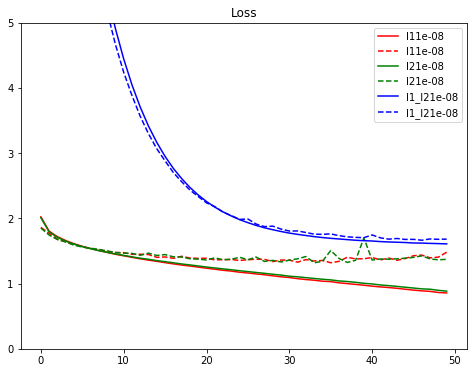

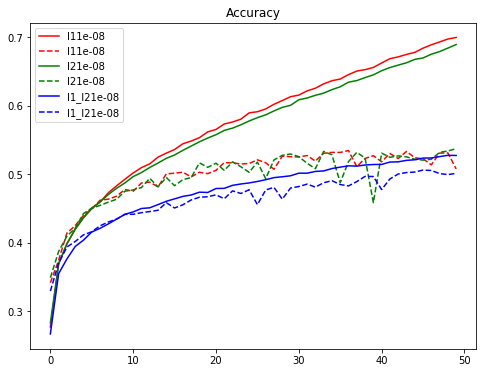

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()